# WHATSAPP CHAT ANALYSIS OF DSN PH-CITY AI+ COMMUNITY 

**To extract your WhatsApp chats, just open any chat with group and follow the steps mentioned below:**

If you are having an iPhone then tap on the Contact Name or the Group Name. In case you are having an Android smartphone then tap on the 3 dots above.<br>
Then scroll to the bottom and top on Export Chat.<br>
Then select without media for simplicity if it asks you whether you want your chats with or without media.<br>
Then email this chat to yourself and download it to your system.<br>
So this is how you can easily get your WhatsApp chats with any person or a group for the task of WhatsApp chat analysis.

**Now let’s start this task by importing the necessary Python libraries that we need for this task:**

In [1]:
#pip install regex
#pip install emoji
#pip install wordcloud
#pip install textblob
#pip install nltk

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import regex
import emoji
from collections import Counter
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from textblob import TextBlob # for sentiment analysis

The dataset we are using here requires a lot of preparation, so let's get some codes that will help us prepare the dataset:

In [3]:
# Extract Time
def date_time(s):
    pattern = '^([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9]+)[ ]?(AM|PM|am|pm)? -'
    result = regex.match(pattern, s)
    if result:
        return True
    return False

# Find Authors or Contacts
def find_author(s):
    s = s.split(":")
    if len(s)==2:
        return True
    else:
        return False
    
# Finding Messages
def getDatapoint(line):
    splitline = line.split(' - ')
    dateTime = splitline[0]
    date, time = dateTime.split(", ")
    message = " ".join(splitline[1:])
    if find_author(message):
        splitmessage = message.split(": ")
        author = splitmessage[0]
        message = " ".join(splitmessage[1:])
    else:
        author= None
    return date, time, author, message

**Now let’s import the data and prepare it in a way that we can use it in a pandas DataFrame:**

In [4]:
data = []
conversation = 'WhatsApp Chat with AI+ PH.txt'
with open(conversation, encoding="utf-8") as fp:
    fp.readline()
    messageBuffer = []
    date, time, author = None, None, None
    while True:
        line = fp.readline()
        if not line:
            break
        line = line.strip()
        if date_time(line):
            if len(messageBuffer) > 0:
                data.append([date, time, author, ' '.join(messageBuffer)])
            messageBuffer.clear()
            date, time, author, message = getDatapoint(line)
            messageBuffer.append(message)
        else:
            messageBuffer.append(line)

In [5]:
df = pd.DataFrame(data, columns=["Date", 'Time', 'Author','Message'])
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
#you can drop null values, df = df.dropna()

Our dataset is completely ready now for the task of WhatsApp chat analysis with Python. <br>Now let’s have a look at the first 7 and last 7 messages and some other insights from the data:

In [7]:
df.head(7)

Date      Time             Author  \
0 2020-02-11   9:36 PM               None   
1 2020-02-22   9:11 PM               None   
2 2020-02-24  10:49 AM               None   
3 2020-02-24  11:48 AM               None   
4 2020-02-24  12:07 PM               None   
5 2020-02-24  12:08 PM  +234 814 787 0497   
6 2020-02-24  12:27 PM               None   

                                             Message  
0           +234 814 787 0497 created group "AI+ PH"  
1                     +234 814 787 0497 added Gosbot  
2          +234 814 787 0497 added +234 813 199 3608  
3          +234 814 787 0497 added +234 705 789 9599  
4  +234 814 787 0497 added Cummi DSN, +234 706 05...  
5  Hi everyone.  First, I want to apologise for n...  
6                             +234 708 909 8444 left

In [8]:
df.tail(7)

Date     Time                   Author  \
3119 2022-07-23  9:14 PM             $Gospel Orok   
3120 2022-07-23  9:16 PM        Emmanuel Boniface   
3121 2022-07-23  9:17 PM            Tochi ErUdItE   
3122 2022-07-23  9:18 PM           Oshimua Victor   
3123 2022-07-23  9:18 PM            Tochi ErUdItE   
3124 2022-07-23  9:19 PM  Ginika Chinonso Francis   
3125 2022-07-25  9:19 AM             $Gospel Orok   

                                                Message  
3119  I admire that zeal, please don't feel discoura...  
3120  All questions asked today were mostly on pandas 🤔  
3121  Walai, I felt that double ff was deliberate, b...  
3122  The same thing happened to me last week If you...  
3123  Yes. Pandas is arguably the most used python l...  
3124               Today's quiz was 🔥 Really enjoyed it  
3125  🌤️🌍👨🏻‍💻👩🏻‍💻 *Good morning Guys*.. It’s a new w...

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3126 entries, 0 to 3125
Data columns (total 4 columns):
Date       3126 non-null datetime64[ns]
Time       3126 non-null object
Author     2608 non-null object
Message    3126 non-null object
dtypes: datetime64[ns](1), object(3)
memory usage: 97.8+ KB


In [10]:
print (df.Author.unique())

[None '+234 814 787 0497' 'ADEBAYO' '$Gospel Orok' '+234 810 409 7269'
 '+234 907 815 8983' 'Aimar🤓 Emmanuel' 'Kenneth Odoemenam'
 '+234 705 789 9599' 'Enos Michael Ope' 'Funminiyi' '+234 905 887 8813'
 '+234 708 282 8150' '+234 813 434 7014' '+234 813 199 3608'
 '+234 816 648 5448' 'Anita DSN AI+' 'Destiny Fullstack' 'Franklin Obasi'
 'Tosin Samuel Jay' '+234 706 482 5368' 'Esther Edoho'
 'Ginika Chinonso Francis' '+234 806 493 2735' 'Bright'
 '+234 703 017 6676' '+234 816 602 5642' '+234 810 408 6552'
 '+234 706 464 3074' 'Muogbo chinemeerem' '+234 703 360 4777'
 '+234 810 282 8226' '+234 816 059 0910' 'Evans 💫' 'Cummi DSN'
 '+234 806 352 3755' '+234 905 759 6155' '+234 803 423 4868' 'Joy Nwaiwu'
 'Victor Ayo' '+234 806 868 7979' '+234 803 668 8333' '+234 814 369 3851'
 'Michael Franklin' '+234 703 864 2087' '+234 814 837 5121'
 '+234 906 281 0407' 'Chijioke' 'Raphael' '+234 708 916 9841'
 '+234 806 445 9813' '+234 903 657 0339' 'Iheanyi' '+234 813 793 2640'
 'Abdulsalam Abimbola Far

In [11]:
#to sort values in the data\Frame to improve readability 

In [12]:
df.sort_values("Date",ascending=False)

Date      Time             Author  \
3125 2022-07-25   9:19 AM       $Gospel Orok   
3010 2022-07-23   8:27 PM     Oshimua Victor   
3018 2022-07-23   8:30 PM            Evans 💫   
3017 2022-07-23   8:30 PM      Tochi ErUdItE   
3016 2022-07-23   8:29 PM               None   
...         ...       ...                ...   
7    2020-02-24  12:48 PM  +234 814 787 0497   
8    2020-02-24   1:49 PM               None   
3    2020-02-24  11:48 AM               None   
1    2020-02-22   9:11 PM               None   
0    2020-02-11   9:36 PM               None   

                                                Message  
3125  🌤️🌍👨🏻‍💻👩🏻‍💻 *Good morning Guys*.. It’s a new w...  
3010  Team Microsoft He wanted to contribute on our ...  
3018                                           ✅correct  
3017                                                  C  
3016  $Gospel Orok: 10. To add a new column, column3...  
...                                                 ...  
7                                       <Media omitted>  
8             +234 814 787 0497 added +234 901 720 0832  
3             +234 814 787 0497 added +234 705 789 9599  
1                        +234 814 787 0497 added Gosbot  
0              +234 814 787 0497 created group "AI+ PH"  

[3126 rows x 4 columns]

In [13]:
#to filter dataset based on dates from June  to July 2022

df=df.loc[(df['Date']>='2022-06-01')&(df['Date']<'2022-08-01')]
df

Date     Time                   Author  \
1593 2022-06-02  6:47 PM                     None   
1594 2022-06-06  3:29 PM             $Gospel Orok   
1595 2022-06-06  9:07 PM             $Gospel Orok   
1596 2022-06-06  9:09 PM             $Gospel Orok   
1597 2022-06-06  9:18 PM           Oshimua Victor   
...         ...      ...                      ...   
3121 2022-07-23  9:17 PM            Tochi ErUdItE   
3122 2022-07-23  9:18 PM           Oshimua Victor   
3123 2022-07-23  9:18 PM            Tochi ErUdItE   
3124 2022-07-23  9:19 PM  Ginika Chinonso Francis   
3125 2022-07-25  9:19 AM             $Gospel Orok   

                                                Message  
1593                             +234 901 942 8018 left  
1594  *Hack and Win Nvidia DLI Scholarship in the FR...  
1595                           Good evening Guys.. 🙌🏻🙌🏻  
1596  I am trying to understand the difference betwe...  
1597  In my own understanding, Feature engineering c...  
...                                                 ...  
3121  Walai, I felt that double ff was deliberate, b...  
3122  The same thing happened to me last week If you...  
3123  Yes. Pandas is arguably the most used python l...  
3124               Today's quiz was 🔥 Really enjoyed it  
3125  🌤️🌍👨🏻‍💻👩🏻‍💻 *Good morning Guys*.. It’s a new w...  

[1533 rows x 4 columns]

In [14]:
#to find the number of unique members via phone numbers 
#by either dropping duplicates 

In [15]:
unique=df.drop_duplicates('Author') #or df.drop_duplicates(subset='Author')

In [16]:
#un=len(pd.unique(df['Author']))

un=df.Author.nunique()
un

35

In [17]:
#using value_counts() to get all count of unique number of authors active appearances
cyy=df['Author'].value_counts(sort=True)

In [18]:
#converting count value to dataframe
count_df_Author=df['Author'].value_counts().rename_axis('unique_contacts').reset_index(name='counts')
count_df_Author

unique_contacts  counts
0                 $Gospel Orok     504
1                 Lukman Idris     215
2               Oshimua Victor     144
3            Emmanuel Boniface     136
4                Tochi ErUdItE      78
5            Florence Egwrudje      67
6                      Evans 💫      50
7             Christian Ajulor      45
8            Ebenezer Justice       27
9                 Esther Edoho      24
10              Franklin Obasi      17
11                      Bright      14
12                      Jacia_      12
13                 Donvictor😍😍      10
14  Abdulsalam Abimbola Farouk      10
15                  adeseyison      10
16     Ginika Chinonso Francis       7
17                  Jamin DSN        5
18                  Chinagorom       5
19                     Raphael       3
20            Michael Franklin       3
21            Tosin Samuel Jay       2
22           +234 703 017 6676       2
23           +234 816 059 0910       1
24           +234 813 492 5452       1
25           +234 813 294 1110       1
26               Anita DSN AI+       1
27              Jammal Adeyemi       1
28                         Iby       1
29           +234 903 657 0339       1
30                       STEVE       1
31           +234 803 423 4868       1
32           +234 811 675 9346       1
33                  Joy Nwaiwu       1
34                      Danita       1

In [19]:
#calculating sum of counts
count_df_Author.sum(axis=0)

unique_contacts    $Gospel OrokLukman IdrisOshimua VictorEmmanuel...
counts                                                          1402
dtype: object

In [20]:
#Active days count 
#df['Date'].value_counts(sort=True)

In [21]:
#to get the number of only unique messages sent by each contact without a repeat.
#df.groupby('Author')['Message'].nunique()

In [22]:
#this count will be used for community progress chart

count_df_date=df['Date'].value_counts().rename_axis('unique_dates').reset_index(name='counts')
#count_df_date

Now let’s have a look at the total number of messages between this WhatsApp chat:

In [23]:
total_messages = df.shape[0]
print(total_messages)

1533


Now let’s have a look at the total number of media messages present in this chat:

In [24]:
media_messages = df[df["Message"]=='<Media omitted>'].shape[0]
print(media_messages)

48


Now let’s extract the emojis present in between the chats and have a look at the emojis present in this chat:

In [25]:
def split_count(text):
    emoji_list = []
    data = regex.findall(r'\X',text)
    for word in data:
       # if any(char in word):
            emoji_list.append(word)
    return emoji_list
df['emoji'] = df["Message"].apply(split_count)

emojis = sum(df['emoji'].str.len())
print(emojis)

93511


Now let’s extract the URLs present in this chat and have a look at the final insights:

In [26]:
URLPATTERN = r'(https?://\S+)'
df['urlcount'] = df.Message.apply(lambda x: regex.findall(URLPATTERN, x)).str.len()
links = np.sum(df.urlcount)

print("Chats between Creation Date and 26th July 2022")
print("Total Messages: ", total_messages)
print("Number of Media Shared: ", media_messages)
print("Number of Emojis Shared:", emojis)
print("Number of Links Shared:", links)

Chats between Creation Date and 26th July 2022
Total Messages:  1533
Number of Media Shared:  48
Number of Emojis Shared: 93511
Number of Links Shared: 22


Now let’s prepare this data to get more insights to analyze all the messages sent in this chat in more detail:

In [27]:
media_messages_df = df[df['Message'] == '<Media omitted>']
messages_df = df.drop(media_messages_df.index)
messages_df['Letter_Count'] = messages_df['Message'].apply(lambda s : len(s))
messages_df['Word_Count'] = messages_df['Message'].apply(lambda s : len(s.split(' ')))
messages_df["MessageCount"]=1

action_dict=[]

l = ['Emmanuel Boniface','Oshimua Victor','Christian Ajulor','Evans 💫','Florence Egwrudje','Jacia_','Tochi ErUdItE']

for i in range(len(l)):
  # Filtering out messages of particular user
  req_df= messages_df[messages_df["Author"] == l[i]]
  # req_df will contain messages of only one particular user
  print(f'\nStats of {l[i]} -')
  #to get names or each contact in the list
  namem=l[i]  
  # shape will print number of rows which indirectly means the number of messages
  print('Messages Sent', req_df.shape[0])
  messag_sent=req_df.shape[0] 
  #Word_Count contains of total words in one message. Sum of all words/ Total Messages will yield words per message
  words_per_message = (np.sum(req_df['Word_Count']))/req_df.shape[0]
  print('Average Words per message', words_per_message)
  #media conists of media messages
  media = media_messages_df[media_messages_df['Author'] == l[i]].shape[0]
  print('Media Messages Sent', media)
  # emojis conists of total emojis
  emojis = sum(req_df['emoji'].str.len())
  print('Emojis Sent', emojis)
  #links consist of total links
  links = sum(req_df["urlcount"])   
  print('Links Sent', links)
  action_dict.append([namem,messag_sent,int(words_per_message),media,emojis,links])


Stats of Emmanuel Boniface -
Messages Sent 134
Average Words per message 10.537313432835822
Media Messages Sent 2
Emojis Sent 7615
Links Sent 1

Stats of Oshimua Victor -
Messages Sent 140
Average Words per message 7.585714285714285
Media Messages Sent 4
Emojis Sent 5239
Links Sent 0

Stats of Christian Ajulor -
Messages Sent 44
Average Words per message 2.6818181818181817
Media Messages Sent 1
Emojis Sent 512
Links Sent 0

Stats of Evans 💫 -
Messages Sent 45
Average Words per message 1.9777777777777779
Media Messages Sent 5
Emojis Sent 429
Links Sent 0

Stats of Florence Egwrudje -
Messages Sent 67
Average Words per message 2.8358208955223883
Media Messages Sent 0
Emojis Sent 854
Links Sent 0

Stats of Jacia_ -
Messages Sent 10
Average Words per message 8.9
Media Messages Sent 2
Emojis Sent 584
Links Sent 1

Stats of Tochi ErUdItE -
Messages Sent 76
Average Words per message 5.776315789473684
Media Messages Sent 2
Emojis Sent 2161
Links Sent 0


In [28]:
#to view list of the captured values
action_dict

[['Emmanuel Boniface', 134, 10, 2, 7615, 1],
 ['Oshimua Victor', 140, 7, 4, 5239, 0],
 ['Christian Ajulor', 44, 2, 1, 512, 0],
 ['Evans 💫', 45, 1, 5, 429, 0],
 ['Florence Egwrudje', 67, 2, 0, 854, 0],
 ['Jacia_', 10, 8, 2, 584, 1],
 ['Tochi ErUdItE', 76, 5, 2, 2161, 0]]

In [29]:
active_list = pd.DataFrame(action_dict, columns=['names','messages_sent','words_average',"Media","Emojis","Links"])

#finding total count 
active_list['Total']=active_list['messages_sent']+active_list['words_average']+active_list['Media']+active_list['Emojis']+active_list['Links']
#or,active_list['Total']=active_list[['names','messages',"Media","Emojis","Links"]].sum(axis=1)

active_list

names  messages_sent  words_average  Media  Emojis  Links  \
0  Emmanuel Boniface            134             10      2    7615      1   
1     Oshimua Victor            140              7      4    5239      0   
2   Christian Ajulor             44              2      1     512      0   
3            Evans 💫             45              1      5     429      0   
4  Florence Egwrudje             67              2      0     854      0   
5             Jacia_             10              8      2     584      1   
6      Tochi ErUdItE             76              5      2    2161      0   

   Total  
0   7762  
1   5390  
2    559  
3    480  
4    923  
5    605  
6   2244

In [30]:
active_list.sort_values(by=['Total'],ascending=False)

names  messages_sent  words_average  Media  Emojis  Links  \
0  Emmanuel Boniface            134             10      2    7615      1   
1     Oshimua Victor            140              7      4    5239      0   
6      Tochi ErUdItE             76              5      2    2161      0   
4  Florence Egwrudje             67              2      0     854      0   
5             Jacia_             10              8      2     584      1   
2   Christian Ajulor             44              2      1     512      0   
3            Evans 💫             45              1      5     429      0   

   Total  
0   7762  
1   5390  
6   2244  
4    923  
5    605  
2    559  
3    480

In [31]:
#sum down vertical column
active_list.sum(axis=0)

names            Emmanuel BonifaceOshimua VictorChristian Ajulo...
messages_sent                                                  516
words_average                                                   35
Media                                                           16
Emojis                                                       17394
Links                                                            2
Total                                                        17963
dtype: object

In [32]:
#active_list.groupby(['names'])['messages_sent','words_average','Media','Emojis'].sum()

C:\Users\Public\DSNanaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 55357 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Public\DSNanaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 56491 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Public\DSNanaconda\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 55357 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Public\DSNanaconda\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 56491 missing from current font.
  font.set_text(s, 0, flags=flags)


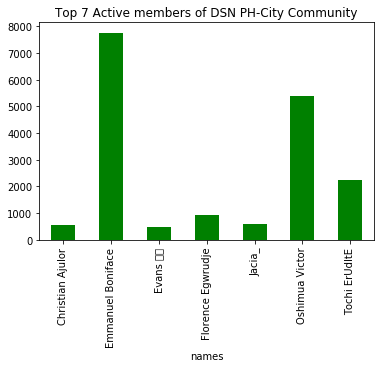

In [33]:
vl=active_list.groupby('names')['Total'].sum()
vl.plot(kind='bar', color='green',title ='Top 7 Active members of DSN PH-City Community')
plt.show()

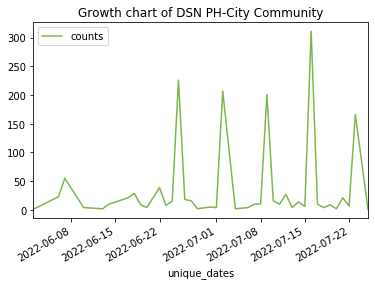

<Figure size 720x360 with 0 Axes>

In [34]:
#Date,month,year and days performance growth chart
%matplotlib inline 
c='#7eb54e'
count_df_date.plot(x='unique_dates',y='counts', kind='line', color=c, title ='Growth chart of DSN PH-City Community')
#plt.rcParams['figure.figsize']=[50,50]

plt.figure( figsize=(10,5))

plt.show()

Now let’s prepare a visualization of the total emojis present in the chat and the type of emojis sent between the two people. It will help in understanding the relationship between both the people:

In [35]:
total_emojis_list = list(set([a for b in messages_df.emoji for a in b]))
total_emojis = len(total_emojis_list)

total_emojis_list = list([a for b in messages_df.emoji for a in b])
emoji_dict = dict(Counter(total_emojis_list))
emoji_dict = sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True)
#for i in emoji_dict:
  #print(i)

In [36]:
#pie chart for showing 
import plotly.express as px
fig = px.pie(active_list, values='Total', names='names')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

C:\Users\Public\DSNanaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning:

Glyph 55357 missing from current font.

C:\Users\Public\DSNanaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning:

Glyph 56491 missing from current font.

C:\Users\Public\DSNanaconda\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning:

Glyph 55357 missing from current font.

C:\Users\Public\DSNanaconda\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning:

Glyph 56491 missing from current font.



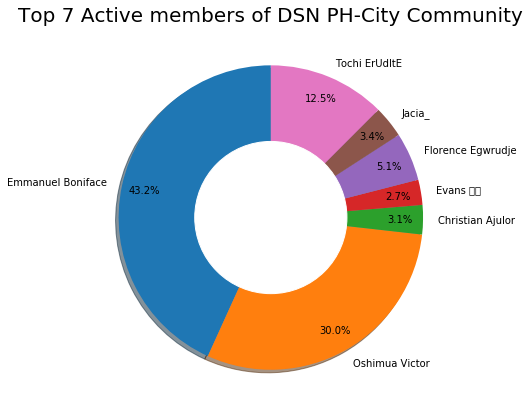

In [37]:
values = active_list["Total"]
labels = active_list["names"]
plt.figure(figsize=(7,7))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, shadow =True)
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Top 7 Active members of DSN PH-City Community", fontsize=20)
plt.show()

In [38]:
#ploting horizontally
directorsTop5=active_list.sort_values(by=['Total'],ascending=True)
directorsTop5

names  messages_sent  words_average  Media  Emojis  Links  \
3            Evans 💫             45              1      5     429      0   
2   Christian Ajulor             44              2      1     512      0   
5             Jacia_             10              8      2     584      1   
4  Florence Egwrudje             67              2      0     854      0   
6      Tochi ErUdItE             76              5      2    2161      0   
1     Oshimua Victor            140              7      4    5239      0   
0  Emmanuel Boniface            134             10      2    7615      1   

   Total  
3    480  
2    559  
5    605  
4    923  
6   2244  
1   5390  
0   7762

In [39]:
fig1=px.bar(directorsTop5,x='Total',y='names', title='Top 7 active members on the group')
fig1.show()

Now let’s have a look at the most used words in this WhatsApp chat by visualizing a word cloud:

There are 94534 words in all the messages.


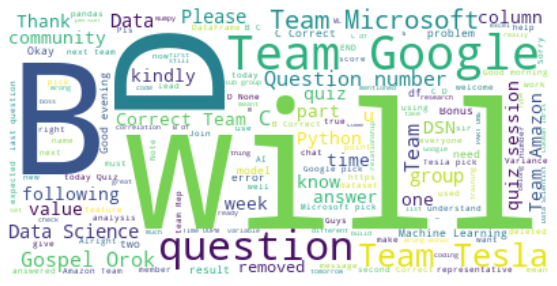

In [40]:
text = " ".join(review for review in messages_df.Message)
print ("There are {} words in all the messages.".format(len(text)))
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Now let’s have a look at the most used words by each person by visualizing two different word clouds:

Author Name: Oshimua Victor


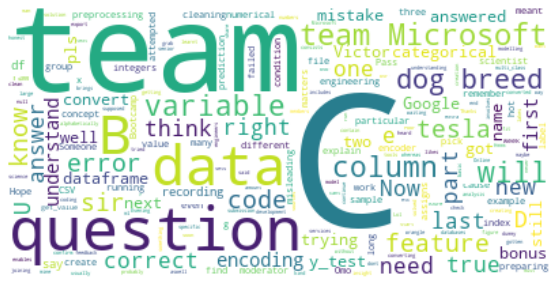

Author Name: Emmanuel Boniface


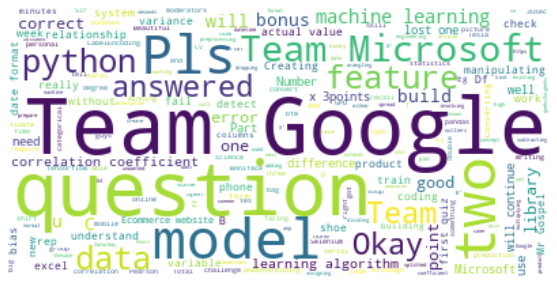

Author Name: Florence Egwrudje


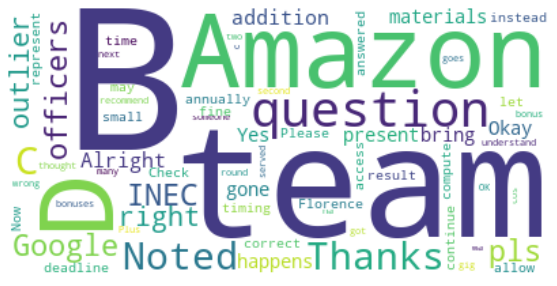

Author Name: Evans 💫


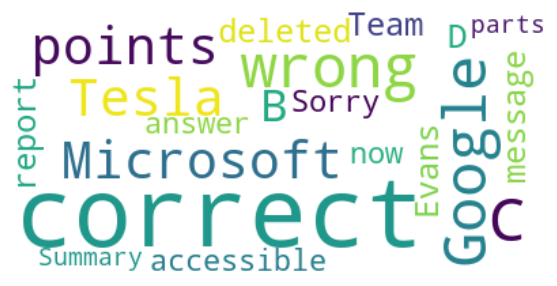

Author Name: Tochi ErUdItE


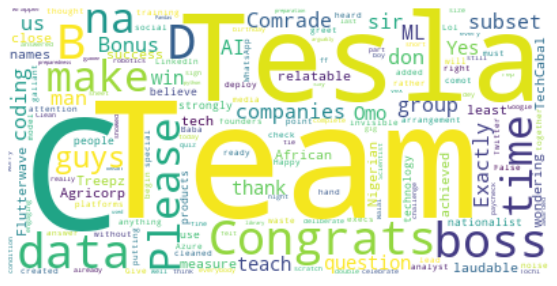

In [41]:
l = ['Oshimua Victor', "Emmanuel Boniface",'Florence Egwrudje','Evans 💫', 'Tochi ErUdItE']
for i in range(len(l)):
  dummy_df = messages_df[messages_df['Author'] == l[i]]
  text = " ".join(review for review in dummy_df.Message)
  stopwords = set(STOPWORDS)
  #Generate a word cloud image
  print('Author Name:',l[i])
  wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
  #Display the generated image   
  plt.figure( figsize=(10,5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

# Now here is how we can analyze the sentiments of WhatsApp chat using Python:

In [42]:
import nltk
import re
from nltk.corpus import stopwords
import string

In [43]:
#nltk.download('vader_lexicon')

In [44]:
df = pd.DataFrame(df, columns=["Date", 'Time', 'Author', 'Message'])
df['Date'] = pd.to_datetime(df['Date'])

#data = df.dropna()
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiments = SentimentIntensityAnalyzer()


In [45]:
df["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in df["Message"]]
df["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in df["Message"]]
df["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in df["Message"]]

In [46]:
df.head()

Date     Time          Author  \
1593 2022-06-02  6:47 PM            None   
1594 2022-06-06  3:29 PM    $Gospel Orok   
1595 2022-06-06  9:07 PM    $Gospel Orok   
1596 2022-06-06  9:09 PM    $Gospel Orok   
1597 2022-06-06  9:18 PM  Oshimua Victor   

                                                Message  Positive  Negative  \
1593                             +234 901 942 8018 left     0.000       0.0   
1594  *Hack and Win Nvidia DLI Scholarship in the FR...     0.278       0.0   
1595                           Good evening Guys.. 🙌🏻🙌🏻     0.492       0.0   
1596  I am trying to understand the difference betwe...     0.144       0.0   
1597  In my own understanding, Feature engineering c...     0.055       0.0   

      Neutral  
1593    1.000  
1594    0.722  
1595    0.508  
1596    0.856  
1597    0.945

In [47]:
x = sum(df["Positive"])
y = sum(df["Negative"])
z = sum(df["Neutral"])

In [48]:
x,y,z

(194.03299999999982, 41.65299999999999, 1091.3089999999997)

In [49]:
def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
sentiment_score(x, y, z)

Neutral 🙂 


In [50]:
df.groupby(['Date'])['Positive','Negative','Neutral'].sum()

Positive  Negative  Neutral
Date                                   
2022-06-02     0.000     0.000    1.000
2022-06-06     1.497     0.479   21.024
2022-06-07     5.846     0.702   47.451
2022-06-10     1.418     0.031    2.551
2022-06-13     0.181     0.000    1.819
2022-06-14     2.019     0.000    7.981
2022-06-17     3.844     0.047   17.109
2022-06-18     5.126     0.627   22.246
2022-06-19     0.952     0.557    7.491
2022-06-20     0.421     0.043    3.536
2022-06-22     7.430     1.157   30.412
2022-06-23     0.629     0.000    7.371
2022-06-24     2.084     0.132   12.784
2022-06-25    29.908     4.906  162.187
2022-06-26     5.813     0.138   12.049
2022-06-27     3.408     0.361   12.230
2022-06-28     0.000     0.000    2.000
2022-06-30     0.201     0.060    4.738
2022-07-01     0.674     0.000    3.326
2022-07-02    23.141     5.483  138.377
2022-07-04     0.000     0.130    1.870
2022-07-06     0.377     0.000    3.623
2022-07-07     2.352     0.236    7.411
2022-07-08     1.553     0.077    8.369
2022-07-09    20.696     9.381  131.922
2022-07-10     0.000     0.000   16.000
2022-07-11     2.654     0.155    7.191
2022-07-12     5.669     0.077   21.254
2022-07-13     0.524     0.018    3.458
2022-07-14     6.475     0.018    7.507
2022-07-15     0.623     0.045    5.332
2022-07-16    34.738    11.728  206.535
2022-07-17     2.637     0.000    7.363
2022-07-18     0.288     0.194    3.518
2022-07-19     1.525     0.000    7.475
2022-07-20     0.059     0.000    1.941
2022-07-21     4.518     0.221   16.261
2022-07-22     1.585     0.353    5.062
2022-07-23    12.921     4.297  110.782
2022-07-25     0.247     0.000    0.753

In [51]:

df=df[df['Date']>='2022-06-01']
fig4 = px.bar(df, x="Date", y="Positive", color="Negative", title="Sentiment of content on whatsapp")
fig4.show()

So, the data I used indicates that most of the messages between me and the other person are neutral. Which means it’s neither positive nor negative.

**Summary<br>**
So this is how we can easily analyze any WhatsApp chat between you and your friend, customer, or even a group of people. You can further use this data for many other tasks of natural language processing. I hope you liked this article on the task of WhatsApp chat analysis with Python. Feel free to ask your valuable questions in the group.